1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import acquire
import prepare

In [2]:
df = acquire.get_titanic_data()
df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [4]:
df = prepare.prep_titanic(df)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              891 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 58.4+ KB


In [6]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

df = df.drop(columns=["sex", "embark_town"])

df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1,0,0,1
4,0,3,0,0,8.0500,1,1,0,1,1,0,1


In [7]:
train, test = train_test_split(df, test_size=.2, random_state=177, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=177, stratify=train.survived)
train, test, validate

(     survived  pclass  sibsp  parch      fare  alone  sex_male  \
 882         0       3      0      0   10.5167      1         0   
 174         0       1      0      0   30.6958      1         1   
 790         0       3      0      0    7.7500      1         1   
 380         1       1      0      0  227.5250      1         0   
 841         0       2      0      0   10.5000      1         1   
 ..        ...     ...    ...    ...       ...    ...       ...   
 441         0       3      0      0    9.5000      1         1   
 438         0       1      1      4  263.0000      0         1   
 42          0       3      0      0    7.8958      1         1   
 840         0       3      0      0    7.9250      1         1   
 245         0       1      2      0   90.0000      0         1   
 
      embark_town_Queenstown  embark_town_Southampton  sex_male  \
 882                       0                        1         0   
 174                       0                        0       

In [8]:
x_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

x_test = test.drop(columns=["survived"])
y_test = test.survived

In [9]:
# 1. What is your baseline prediction? What is your baseline accuracy? 
# remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
# When you make those predictions, what is your accuracy? This is your baseline accuracy.
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
x_train = train.drop(columns=["survived"])
y_train = train.survived

# What is your baseline prediction? 
baseline = y_train.mode()

# What is your baseline accuracy? 
match_baseline_prediction = (y_train == 0)
baseline_accuracy = match_baseline_prediction.mean()

print(f'Our baseline accuracy is: {baseline_accuracy:.3} or {baseline_accuracy:.3%}')

Our baseline accuracy is: 0.616 or 61.647%


In [11]:
# 2. Fit the decision tree classifier to your training sample and transform 
# (i.e. make predictions on the training sample)

clf1 = DecisionTreeClassifier(max_depth=1, random_state=177)
clf1 = clf1.fit(x_train, y_train)
y_predictions = clf1.predict(x_train)

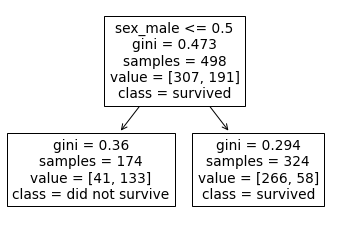

In [23]:
plot_tree(clf1, feature_names=x_train.columns,class_names=['survived','did not survive'])
plt.show()

In [28]:
# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

mod_score = clf1.score(x_train, y_train)
con_matrix = pd.DataFrame(confusion_matrix(y_train, y_predictions))
class_report = classification_report(y_train, y_predictions)
print(f'Accuracy using Model Score:\n {mod_score:.2%}')
print(f'Using Confusion Matrix:\n {con_matrix}')
print(f'and Class report:\n {class_report}')

Accuracy using Model Score:
 80.12%
Using Confusion Matrix:
      0    1
0  266   41
1   58  133
and Class report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.79       498
weighted avg       0.80      0.80      0.80       498



In [34]:
# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

tp = con_matrix.loc[0,0]
fp = con_matrix.loc[1,0]
fn = con_matrix.loc[0,1]
tn = con_matrix.loc[1,1]
all = tp+fp+fn+tn
print(f'True Positive(tp): {tp} \nFalse Positive(fp): {fp} \nFalse Negative(fn): {fn} \nTrue Negative(tn): {tn}')

True Positive(tp): 266 
False Positive(fp): 58 
False Negative(fn): 41 
True Negative(tn): 133


In [38]:

accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy:.4}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate:.4}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate:.4}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate:.4}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate:.4}")

precision = tp/(tp+fp)
print(f"Precision: {precision:.4}")

recall = tp/(tp+fn)
print(f"Recall: {recall:.4}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score:.4}")

support_pos = tp+fn
print(f"Support (0): {support_pos}")

support_neg = fp+tn
print(f"Support (1): {support_neg}")

Accuracy: 0.8012
True Positive Rate: 0.8664
False Positive Rate: 0.3037
True Negative Rate: 0.6963
False Negative Rate: 0.1336
Precision: 0.821
Recall: 0.8664
F1 Score: 0.8431
Support (0): 307
Support (1): 191


In [43]:
# 5. Run through steps 2-4 using a different max_depth value.
# Let's 
for i in range(2, 21):
    # Make the thing
    tree = DecisionTreeClassifier(max_depth=i, random_state=177)

    # Fit the thing
    tree = tree.fit(x_train, y_train)

    # Use the thing
    y_predictions = tree.predict(x_train)

    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820988    0.764368  0.801205    0.792678      0.799272
recall       0.866450    0.696335  0.801205    0.781392      0.801205
f1-score     0.843106    0.728767  0.801205    0.785937      0.799253
support    307.000000  191.000000  0.801205  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.819242    0.832258  0.823293    0.825750      0.824234
recall       0.915309    0.675393  0.823293    0.795351      0.823293
f1-score     0.864615    0.745665  0.823293    0.805140      0.818994
support    307.000000  191.000000  0.823293  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.851064    0.840237   0.84739    0.845650      0.846911
recall       0.912052    0.743455   0.84739    0.827754      0.847390
f1-score     

In [ ]:
# 6. Which model performs better on your in-sample data?


In [ ]:
# 7. Which model performs best on your out-of-sample data, the validate set?